# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


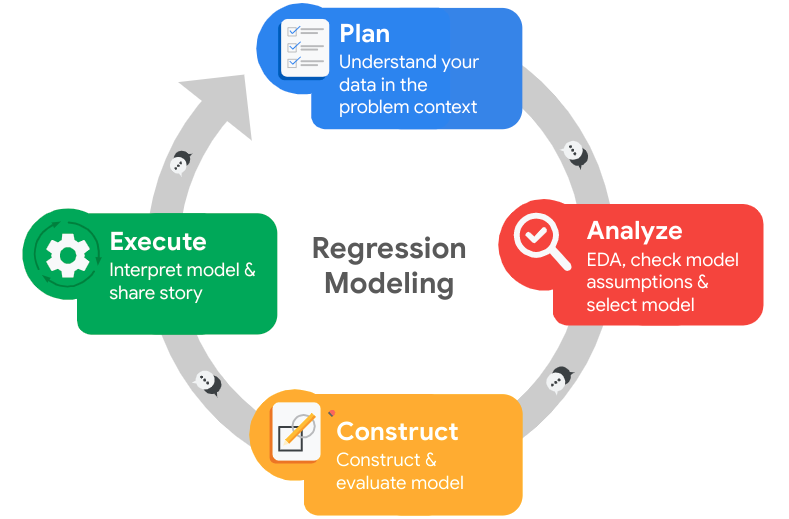

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages

# For data manipulation
import numpy as np
import pandas as pd
import scipy.stats as stats
# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree


# For saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.shape

(14999, 10)

### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed

df = df0.drop_duplicates(keep = 'first')
# Display first few rows of new dataframe as needed
df.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

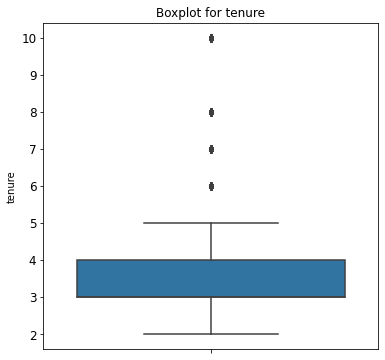

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
sns.boxplot(data = df, y = 'tenure')
plt.title('Boxplot for tenure', fontsize = 12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [12]:
# Determine the number of rows containing outliers
percentile25 = df['tenure'].quantile(.25)
percentile75 = df['tenure'].quantile(.75)
IQR = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR
print(f'The lower limit is: {lower_limit}, The upper limit is: {upper_limit}')
outliers = df[(df['tenure'] > upper_limit) | (df['tenure'] < lower_limit)]
print(f'Number of outliers in tenure is: {len(outliers)}')

The lower limit is: 1.5, The upper limit is: 5.5
Number of outliers in tenure is: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
print(df['left'].value_counts())
# Get percentages of people who left vs. stayed
print(df['left'].value_counts(normalize = True))


0    10000
1     1991
Name: left, dtype: int64
0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

In [14]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [15]:
df['department'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

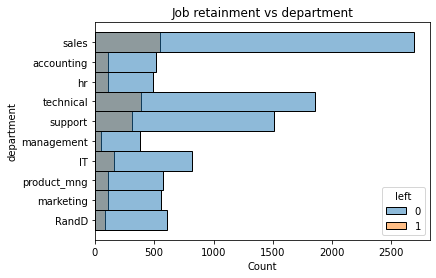

In [16]:
# Create a plot as needed
sns.histplot(data = df, y = 'department', hue = 'left')
plt.title('Job retainment vs department')
plt.show()

<AxesSubplot:xlabel='satisfaction_level', ylabel='salary'>

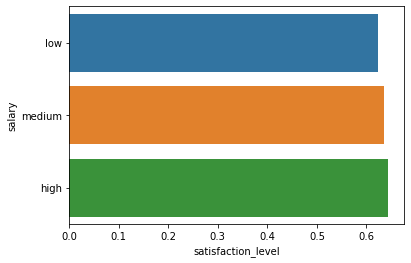

In [17]:
# Create a plot as needed
sns.barplot(y = df['salary'], x = df['satisfaction_level'], ci = False)

<AxesSubplot:xlabel='number_project', ylabel='Count'>

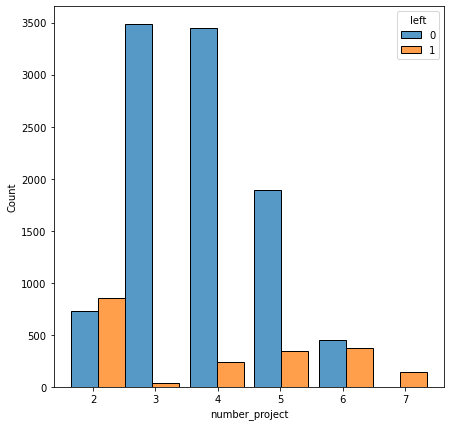

In [18]:
# Create a plot as needed
plt.figure(figsize = (7,7))
sns.histplot(data = df, x = 'number_project', hue = 'left', multiple='dodge', shrink=5)

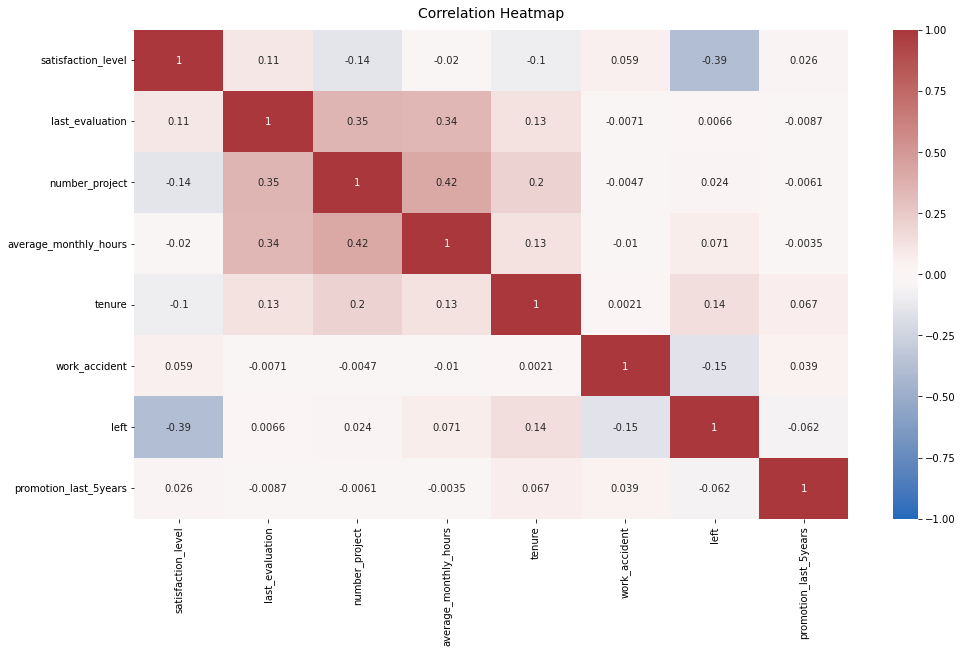

In [19]:
# Create a plot as needed
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

<AxesSubplot:xlabel='tenure', ylabel='Count'>

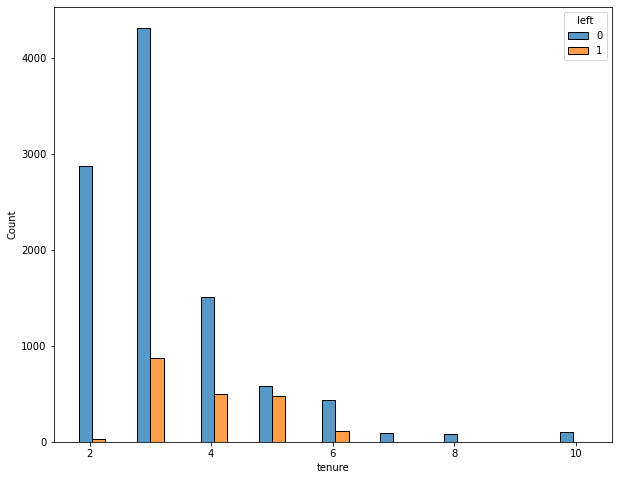

In [20]:
# Create a plot as needed
plt.figure(figsize = (10,8))
sns.histplot(data = df, x = 'tenure', hue = 'left', multiple = 'dodge', shrink=5)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

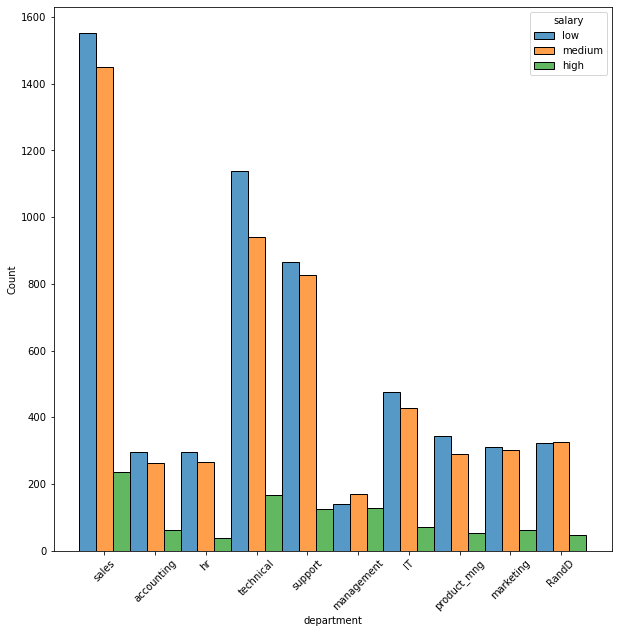

In [21]:
# Create a plot as needed
plt.figure(figsize = (10,10))
sns.histplot(data = df, x = 'department', hue = 'salary', multiple = 'dodge')
plt.xticks(rotation = 45)

<AxesSubplot:xlabel='left', ylabel='tenure'>

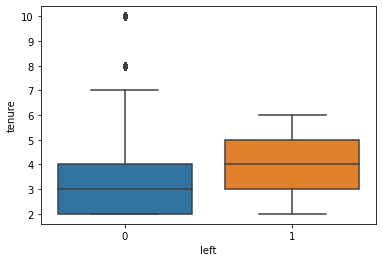

In [22]:
# Create a plot as needed
sns.boxplot(data = df, y = 'tenure', x = 'left')

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Classification based on if the worker left or not, 1 meaning they left, 0 meaning they haven't left.

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

In [23]:
# Copy the dataframe
df_enc = df.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [24]:
df_clear = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

In [25]:
### YOUR CODE HERE ###
X = df_clear.drop(['left'], axis = 1)
y = df_clear['left']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .2, stratify = y, random_state = 10)

In [27]:
Logreg = LogisticRegression(max_iter = 500, random_state = 22)
fitted = Logreg.fit(X_train, y_train)
y_pred = fitted.predict(X_test)

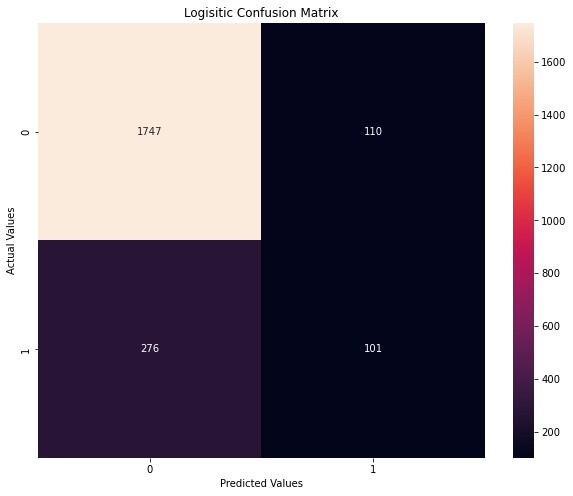

In [28]:
log_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(log_cm, annot=True, fmt = 'g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Logisitic Confusion Matrix')
plt.show()

In [29]:
df_clear['left'].value_counts(normalize = True)

0    0.831468
1    0.168532
Name: left, dtype: float64

In [30]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.94      0.90      1857
    Predicted would leave       0.48      0.27      0.34       377

                 accuracy                           0.83      2234
                macro avg       0.67      0.60      0.62      2234
             weighted avg       0.80      0.83      0.81      2234



In [31]:
path = '/Users/ice50l/Downloads/Model/'

# Defining pickle write and read functions

In [32]:
def write_pickle(path, model_object, save_as:str):
    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [33]:
def read_pickle(path, saved_model_name:str):
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [34]:
'''''
dtc = DecisionTreeClassifier(random_state = 42)
parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2, 32, 1),
    'min_samples_leaf' : range(1, 10, 1),
    'min_samples_split' : range(2, 10, 1),
    'splitter' : ['best', 'random']
}
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

grid_search_dt = GridSearchCV(dtc, parameters, scoring = scoring, cv = 5, n_jobs = -1, verbose = 1, refit = 'roc_auc')
grid_search_dt.fit(X_train, y_train)
'''''

"''\ndtc = DecisionTreeClassifier(random_state = 42)\nparameters = {\n    'criterion' : ['gini', 'entropy'],\n    'max_depth' : range(2, 32, 1),\n    'min_samples_leaf' : range(1, 10, 1),\n    'min_samples_split' : range(2, 10, 1),\n    'splitter' : ['best', 'random']\n}\nscoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}\n\ngrid_search_dt = GridSearchCV(dtc, parameters, scoring = scoring, cv = 5, n_jobs = -1, verbose = 1, refit = 'roc_auc')\ngrid_search_dt.fit(X_train, y_train)\n"

In [35]:
#write_pickle(path, grid_search_dt, 'grid_search_dt')

In [36]:
grid_search_dt = read_pickle(path, 'grid_search_dt')

In [37]:
grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'best'}

In [38]:
grid_search_dt.best_score_

0.9736369405539019

In [39]:
dtc = DecisionTreeClassifier(criterion = 'entropy', 
                             max_depth = 5, min_samples_leaf = 2, min_samples_split = 2, splitter= 'best')
dtc_fitted = dtc.fit(X_train, y_train)
y_pred = (X_test)

In [40]:
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print('The Testing Accuracy is:', dtc_acc)
dtc_score = dtc.score(X_test, y_test)
print('Score:', dtc_score)

The Testing Accuracy is: 0.9843330349149507
Score: 0.9843330349149507


Text(0, 0.5, 'Features')

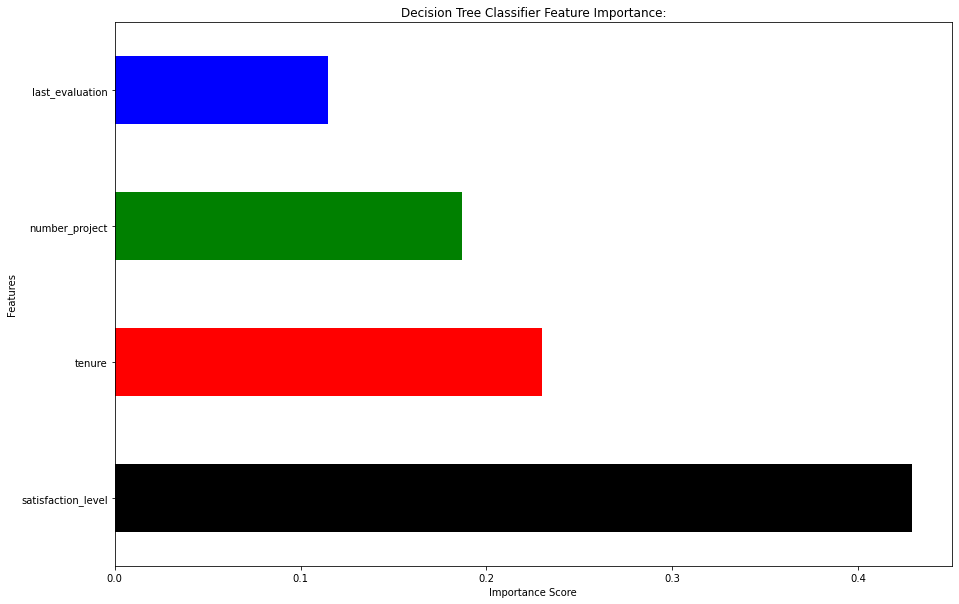

In [41]:
plt.figure(figsize = (15,10))
pd.Series(dtc.feature_importances_, index=X.columns).nlargest(4).plot(kind='barh', 
                                                                      color = ['black', 'red', 'green', 'blue'])
plt.title('Decision Tree Classifier Feature Importance:')
plt.xlabel('Importance Score')
plt.ylabel('Features')

In [42]:
# It appears that satisfaction level is the most important feature that has a large impact on the model.

In [43]:
'''''
rfc = RandomForestClassifier(random_state = 22)
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1],
             'max_samples': [0.7, 1],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

rfc_grid = GridSearchCV(rfc, cv_params, scoring = scoring, cv = 5, n_jobs = -1, verbose = 1, refit = 'roc_auc')
'''''

"''\nrfc = RandomForestClassifier(random_state = 22)\ncv_params = {'max_depth': [3,5, None], \n             'max_features': [1],\n             'max_samples': [0.7, 1],\n             'min_samples_leaf': [1,2,3],\n             'min_samples_split': [2,3,4],\n             'n_estimators': [300, 500],\n             }  \nscoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}\n\nrfc_grid = GridSearchCV(rfc, cv_params, scoring = scoring, cv = 5, n_jobs = -1, verbose = 1, refit = 'roc_auc')\n"

In [44]:
'''''
%%time
rfc_grid.fit(X_train, y_train)
'''''

"''\n%%time\nrfc_grid.fit(X_train, y_train)\n"

In [45]:
#write_pickle(path, rfc_grid, 'rfc_grid')

In [46]:
rfc_grid = read_pickle(path, 'rfc_grid')

In [47]:
rfc_grid.best_params_

{'max_depth': None,
 'max_features': 1,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

In [48]:
rfc_grid.best_score_

0.9801045855745534

In [49]:
rfc = RandomForestClassifier(max_depth = 5, 
                             max_features = 1, max_samples = .7, 
                             min_samples_leaf = 1, min_samples_split = 2,
                            n_estimators = 500)
rfc_fitted = rfc.fit(X_train, y_train)
y_pred = rfc_fitted.predict(X_test)

rfc_acc = accuracy_score(y_test, rfc.predict(X_test))
print('The Testing Accuracy is:', rfc_acc)
rfc_score = rfc.score(X_test, y_test)
print('Score:', rfc_score)

The Testing Accuracy is: 0.8710832587287377
Score: 0.8710832587287377


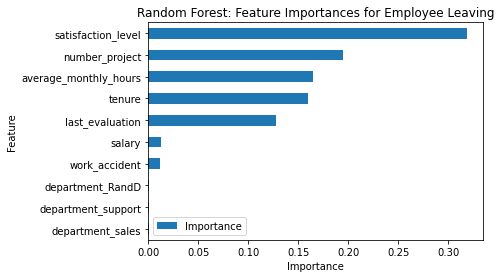

In [50]:
# Get feature importances
feat_impt = rfc_grid.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rfc_grid.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

# Changing Data and Feature Engineering

Dropping the satisfaction level for feature engineering and testing.

In [51]:
df2 = df_enc.drop('satisfaction_level', axis=1)
df2.head(10)

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6,0.77,6,247,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7,0.85,5,259,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
8,1.00,5,224,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
9,0.53,2,142,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [52]:
df2['overworked'] = df2['average_monthly_hours']


print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


The average monthly worktime for an employee is around 176 hours in a typical 5-day work week.

In [53]:
df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,157
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,262
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,272
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,223
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,159


Created a boolean row for overworked employees, 1 = Overworked, 0 = Not Overworked

In [54]:
df2['overworked'] = (df2['overworked'] > 175).astype(int)
df2.head(10)

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
5,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
6,0.77,6,247,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
7,0.85,5,259,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
8,1.00,5,224,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
9,0.53,2,142,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [55]:
df2 = df2.drop('average_monthly_hours', axis = 1)
df2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


Fitting another model using updated dataframe

In [56]:
#Predictor
y = df2['left']

#Features
X = df2.drop('left', axis = 1)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, stratify = y, random_state = 22)

# Defining ROC curve function

In [58]:
def plot_roc_curve(model):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

    plt.figure(figsize = (15,10))
    plt.plot([0,1], [0,1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(model + ' ROC Curve')
    plt.show()

### Decision Tree Classifier New Data

In [59]:
dtn = DecisionTreeClassifier(random_state = 22)

cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

grid_dt2 = GridSearchCV(dtn, cv_params, scoring = scoring, cv = 4, refit = 'roc_auc')

In [60]:
%%time 
grid_dt2.fit(X_train, y_train)

CPU times: user 3.13 s, sys: 111 ms, total: 3.25 s
Wall time: 3.44 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=22),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'precision', 'roc_auc', 'accuracy', 'f1', 'recall'})

In [61]:
grid_dt2.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 6}

In [62]:
grid_dt2.best_score_

0.9584106945537652

In [63]:
dtc2 = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 1, min_samples_split = 6)
dtc2_fitted = dtc2.fit(X_train, y_train)
y_pred = (X_test)

In [64]:
dtc2_acc = accuracy_score(y_test, dtc2.predict(X_test))
print('The Testing Accuracy is:', dtc2_acc)
dtc2_score = dtc2.score(X_test, y_test)
print('Score:', dtc2_score)

The Testing Accuracy is: 0.9737390579408086
Score: 0.9737390579408086


In [65]:
#dtc2_importance = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
dtc2_importance = pd.DataFrame(grid_dt2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
dtc2_importance = dtc2_importance.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
dtc2_importance = dtc2_importance[dtc2_importance['gini_importance'] != 0]
dtc2_importance

,gini_importance
number_project,0.387472
last_evaluation,0.329233
tenure,0.178420
overworked,0.100242
department_support,0.001076
work_accident,0.000999
department_management,0.000762
salary,0.000655
department_hr,0.000473
department_accounting,0.000236


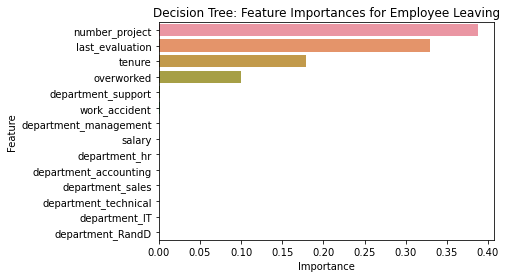

In [66]:
sns.barplot(data=dtc2_importance, x="gini_importance", y=dtc2_importance.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

In [67]:
y_pred_probs = dtc2.predict_proba(X_test)[:,1]
print(y_pred_probs[0])

0.011918492887351018


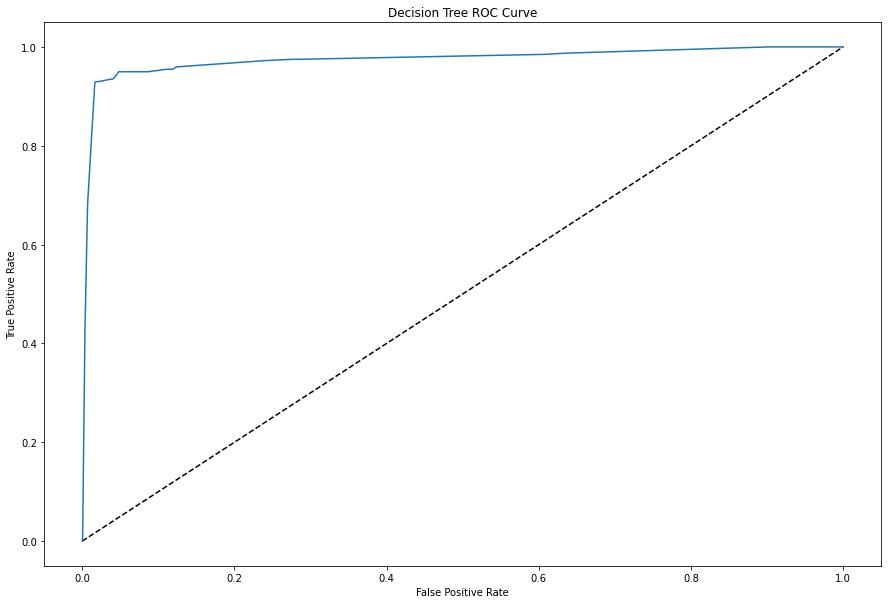

In [68]:
plot_roc_curve('Decision Tree')

In [69]:
print(roc_auc_score(y_test, y_pred_probs))

0.9742747972747294


# Random Forest Classifier

In [70]:
'''''
# Instantiate model
rfc2 = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
gridrfc2 = GridSearchCV(rfc2, cv_params, scoring=scoring, cv=4, refit='roc_auc')
'''''


"''\n# Instantiate model\nrfc2 = RandomForestClassifier(random_state=0)\n\n# Assign a dictionary of hyperparameters to search over\ncv_params = {'max_depth': [3,5, None], \n             'max_features': [1.0],\n             'max_samples': [0.7, 1.0],\n             'min_samples_leaf': [1,2,3],\n             'min_samples_split': [2,3,4],\n             'n_estimators': [300, 500],\n             }  \n\n# Assign a dictionary of scoring metrics to capture\nscoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}\n\n# Instantiate GridSearch\ngridrfc2 = GridSearchCV(rfc2, cv_params, scoring=scoring, cv=4, refit='roc_auc')\n"

In [71]:
#%%time
#gridrfc2.fit(X_train, y_train)


In [72]:
#write_pickle(path, gridrfc2, 'hr_rf2')

In [73]:
gridrfc2 = read_pickle(path, 'hr_rf2')

In [74]:
gridrfc2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [75]:
gridrfc2.best_score_

0.9651206879667463

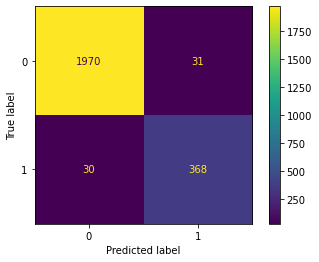

In [76]:
preds = gridrfc2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=gridrfc2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=gridrfc2.classes_)
disp.plot(values_format='')

In [77]:
rfc22 = RandomForestClassifier(max_depth = 5, max_features = 1, max_samples = .7, min_samples_leaf = 2, min_samples_split = 2, n_estimators = 500)
rfc22.fit(X_train, y_train)
y_pred = rfc22.predict(X_test)

In [78]:
rfc22_acc = accuracy_score(y_test, rfc22.predict(X_test))
print('The Testing Accuracy is:', rfc22_acc)

The Testing Accuracy is: 0.8340975406419341


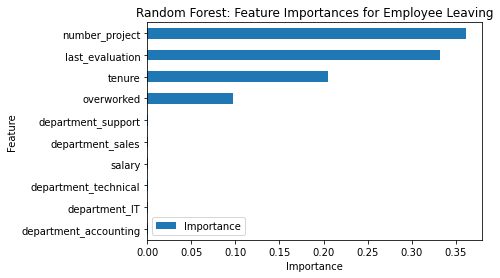

In [79]:
# Get feature importances
feat_impt = gridrfc2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(gridrfc2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

In [80]:
y_pred_probs = rfc22.predict_proba(X_test)[:,1]
print(y_pred_probs[0])

0.0954820356714071


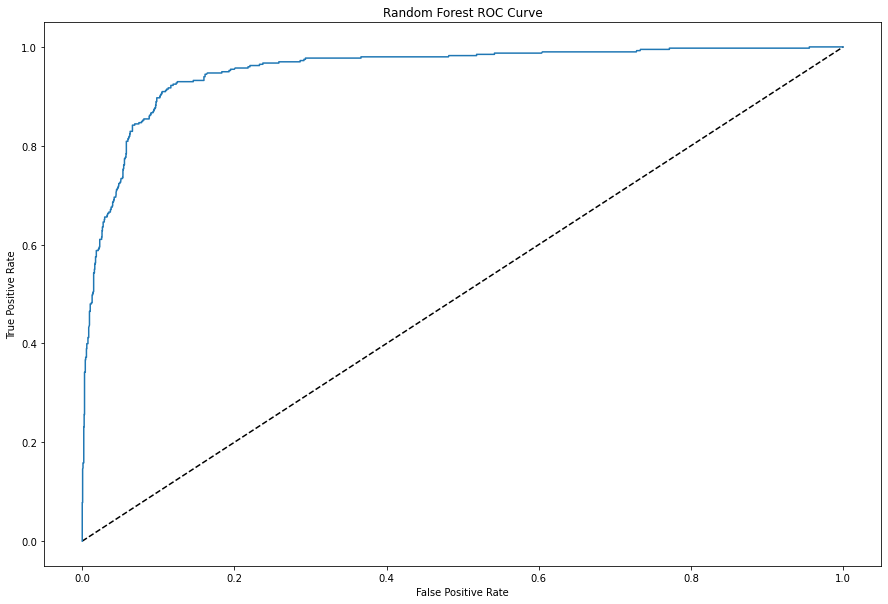

In [81]:
plot_roc_curve('Random Forest')

In [82]:
print(roc_auc_score(y_test, y_pred_probs))

0.9526781835213047


# XGBOOST

In [83]:
xgb = XGBClassifier(random_state = 42)

param_dist = {
    'max_depth': stats.randint(3, 10),
    'learning_rate': stats.uniform(0.01, 0.1),
    'subsample': stats.uniform(0.5, 0.5),
    'n_estimators':stats.randint(50, 200)
}
randxgb = RandomizedSearchCV(xgb, param_distributions = param_dist, cv = 5, scoring = 'accuracy')
randxgb.fit(X_train, y_train)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd8c979fbb0>,
         

In [84]:
print("Best set of hyperparameters: ", randxgb.best_params_)
print("Best score: ", randxgb.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.04619969488368961, 'max_depth': 4, 'n_estimators': 108, 'subsample': 0.5648746117257679}
Best score:  0.9645537925177183


In [85]:
xgbst = XGBClassifier(learning_rate = 0.04944002702712801, max_depth = 7, n_estimators = 141, subsample = 0.9571310379377862, random_state = 42)
xgbst.fit(X_train, y_train)
y_pred = xgbst.predict(X_test)
acc_xgb = accuracy_score(y_pred, y_test)
print(f'The Accuracy Score is: {acc_xgb}')

The Accuracy Score is: 0.9758232596915382


In [86]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2015
           1       0.91      0.94      0.93       384

    accuracy                           0.98      2399
   macro avg       0.95      0.96      0.96      2399
weighted avg       0.98      0.98      0.98      2399



### Feature Importance for XGBOOST

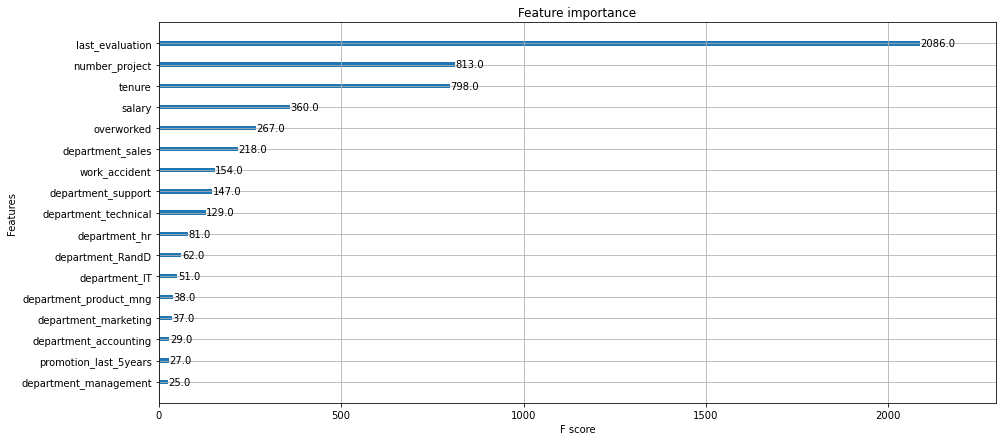

In [87]:
fig, ax = plt.subplots(figsize=(15, 7))
plot_importance(xgbst, ax = ax)
plt.show()

Text(0.5, 1.0, 'XGBOOST Confusion Matrix')

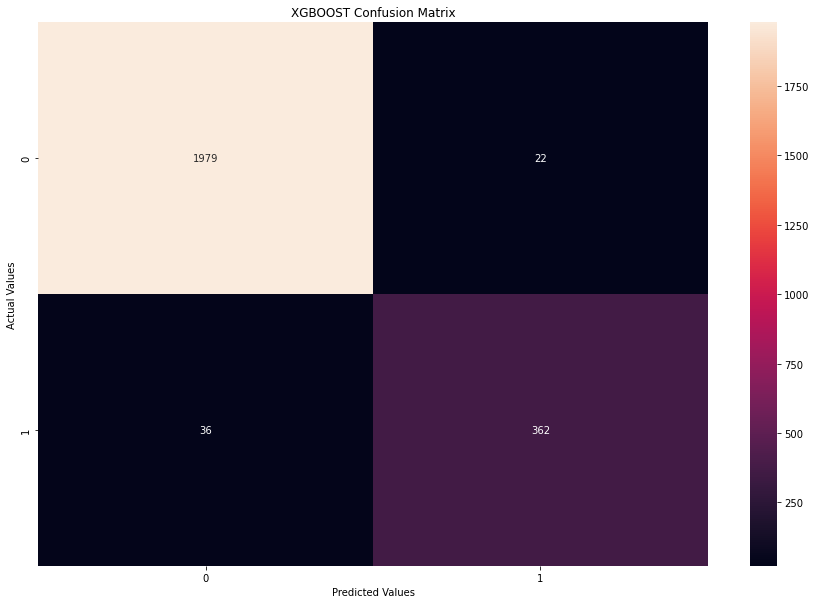

In [88]:
plt.figure(figsize = (15,10))
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt = 'g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('XGBOOST' + ' Confusion Matrix')

# Logistic Regression

In [89]:
'''''
lgr = LogisticRegression(random_state = 42)
param_grid = {
    'penalty': ['l1', 'l2'],              # Regularization type
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'fit_intercept': [True, False],       # Whether to fit an intercept term
    'solver': ['saga', 'lbfgs'],     # Solver algorithm
    'max_iter': [100, 200, 300],          # Maximum number of iterations
    'multi_class': ['auto', 'ovr', 'multinomial'],  # Multi-class options
    'class_weight': [None, 'balanced'],   # Class weight options
    'random_state': [42],                # Random seed for reproducibility
}

lgrGrid = GridSearchCV(lgr, param_grid, cv = 5, scoring = 'accuracy')
lgrGrid.fit(X_train, y_train)
'''''


"''\nlgr = LogisticRegression(random_state = 42)\nparam_grid = {\n    'penalty': ['l1', 'l2'],              # Regularization type\n    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength\n    'fit_intercept': [True, False],       # Whether to fit an intercept term\n    'solver': ['saga', 'lbfgs'],     # Solver algorithm\n    'max_iter': [100, 200, 300],          # Maximum number of iterations\n    'multi_class': ['auto', 'ovr', 'multinomial'],  # Multi-class options\n    'class_weight': [None, 'balanced'],   # Class weight options\n    'random_state': [42],                # Random seed for reproducibility\n}\n\nlgrGrid = GridSearchCV(lgr, param_grid, cv = 5, scoring = 'accuracy')\nlgrGrid.fit(X_train, y_train)\n"

In [90]:
#write_pickle(path, lgrGrid, 'lgr_grid')

In [91]:
lgr_grid = read_pickle(path, 'lgr_grid')

In [92]:
lgr_grid.best_params_

{'C': 0.001,
 'class_weight': None,
 'fit_intercept': True,
 'max_iter': 100,
 'multi_class': 'auto',
 'penalty': 'l1',
 'random_state': 42,
 'solver': 'saga'}

In [93]:
lgr_grid.best_score_

0.8339241360610459

In [94]:
lgr2 = LogisticRegression(C = .001, class_weight = None, fit_intercept = True, max_iter = 100, multi_class = 'auto', penalty = 'l1', random_state = 42, solver = 'saga')
lgr2.fit(X_train, y_train)
y_pred = lgr2.predict(X_test)

In [95]:
acc_lgr = accuracy_score(y_pred, y_test)
print(f'The Accuracy Score is: {acc_lgr}')

The Accuracy Score is: 0.8340975406419341


In [96]:
y_pred_probs = xgbst.predict_proba(X_test)[:,1]
print(y_pred_probs[0])

0.0032272085


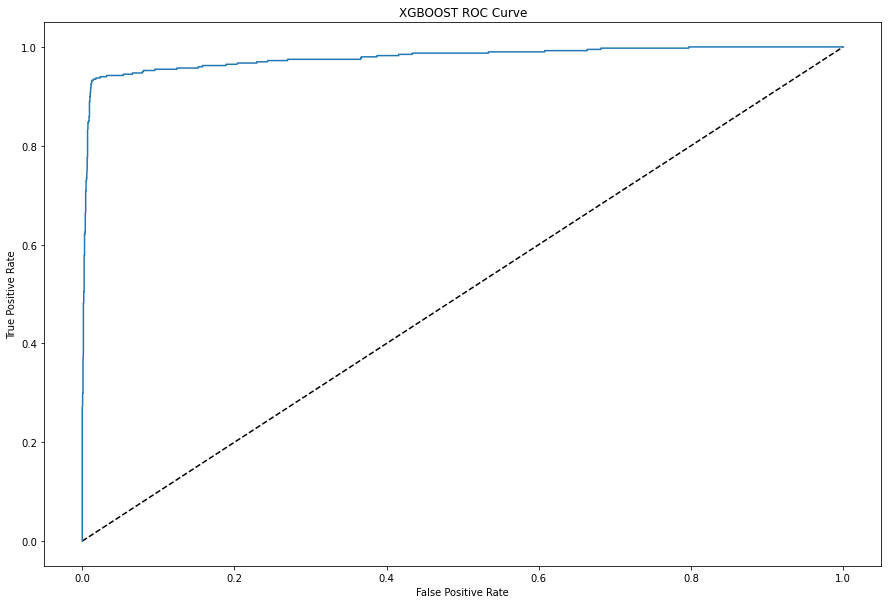

In [97]:
plot_roc_curve('XGBOOST')

In [98]:
print(roc_auc_score(y_test, y_pred_probs))

0.9789514790343523


# KNN Classifier

In [99]:
KNN = KNeighborsClassifier()
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
KNN_grid = GridSearchCV(KNN, grid_params, verbose = 1, cv = 3, n_jobs = -1)
KNN_grid.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [100]:
KNN_grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}

In [101]:
KNN_grid.best_score_

0.9396373267647404

In [102]:
KNN = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 5, weights = 'uniform')
KNN.fit(X_test, y_test)
y_pred = KNN.predict(X_test)


In [103]:
acc_KNN = accuracy_score(y_pred, y_test)
print(f'The Accuracy Score is: {acc_KNN}')

The Accuracy Score is: 0.9541475614839516


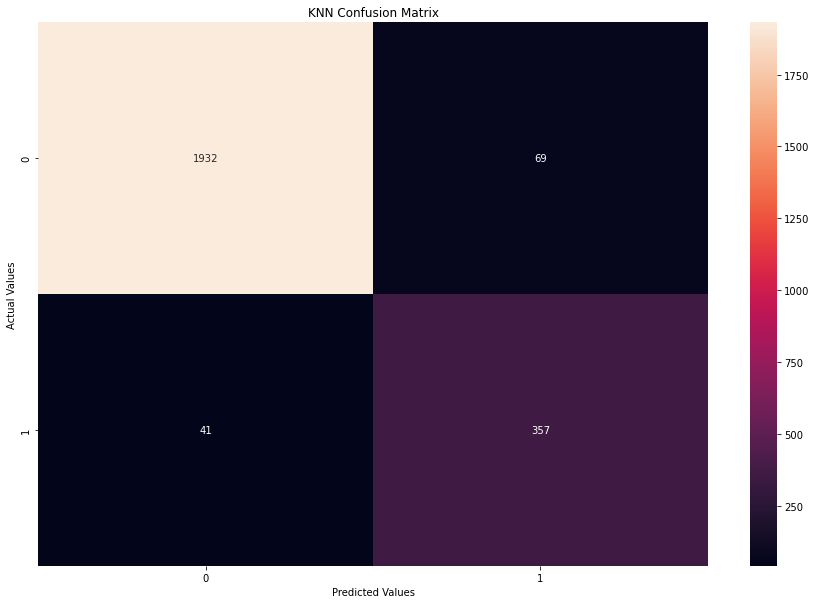

In [104]:
plt.figure(figsize = (15,10))
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt = 'g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('KNN' + ' Confusion Matrix')
plt.show()

In [105]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1973
           1       0.90      0.84      0.87       426

    accuracy                           0.95      2399
   macro avg       0.93      0.91      0.92      2399
weighted avg       0.95      0.95      0.95      2399



In [106]:
y_pred_probs = KNN.predict_proba(X_test)[:,1]
print(y_pred_probs[0])

0.0


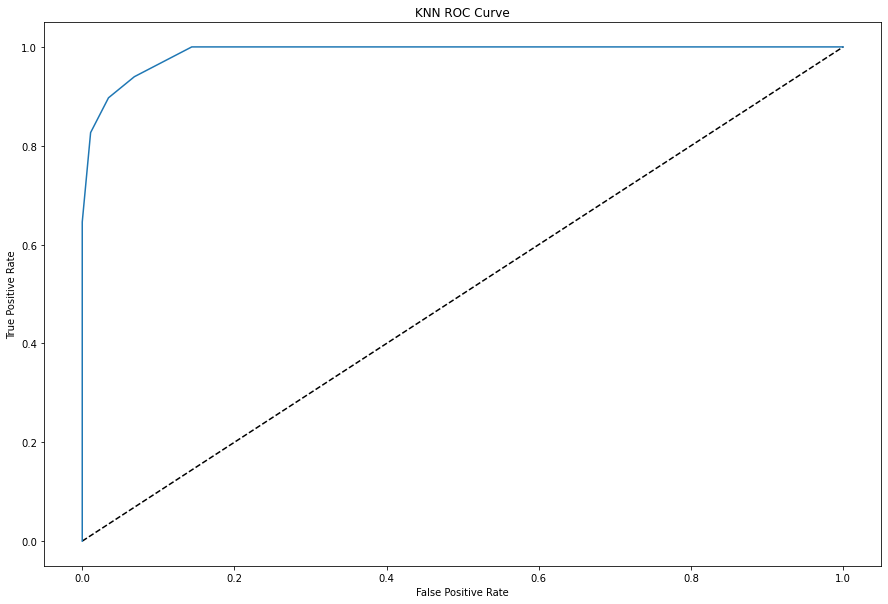

In [107]:
plot_roc_curve('KNN')

In [108]:
print(roc_auc_score(y_test, y_pred_probs))

0.9888033370249548


# Score Comparison

In [109]:
models = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest Classifier', 'XG Boost', 'Logistic Regression','KNN'],
    'Score': [dtc2_score, rfc22_acc, acc_xgb, acc_lgr, acc_KNN]
 })
models = models.sort_values('Score', ascending = False)
models

,Model,Score
2,XG Boost,0.975823
0,Decision Tree,0.973739
4,KNN,0.954148
1,Random Forest Classifier,0.834098
3,Logistic Regression,0.834098


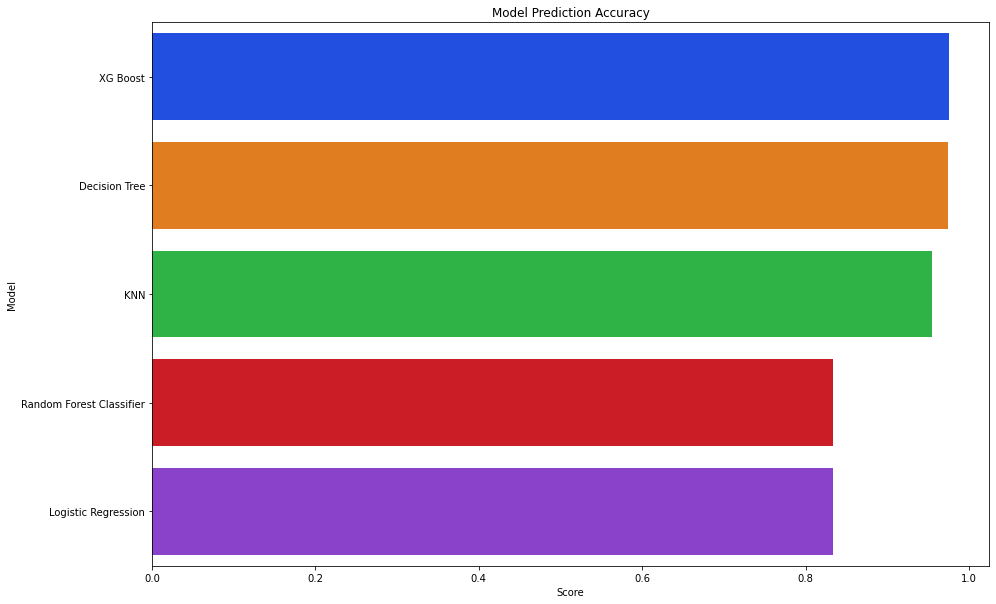

In [110]:
plt.figure(figsize = (15,10))
sns.barplot(data = models, 
            y = 'Model', 
            x = 'Score',
            palette = 'bright')
plt.title('Model Prediction Accuracy')
plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

Logistic Regression only appears to have achieved a 83% accuracy rate, XGBOOST along with tree based models achieved around the same at 97% with XGBOOST being slightly higher.

### Conclusion, Recommendations, Next Steps

In order to retain the most employees possible and promote work culture, we would need to
1. Reduce number of projects
2. Promote employees more often
3. Don't overwork employees
4. High evaluation scores should only be granted to those who work more than average.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.